In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, DoubleType, DateType
from pyspark.sql.functions import col, sum as _sum, avg, when, lit
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


spark = SparkSession.builder.getOrCreate()

In [ ]:
schema = StructType([
    StructField("order_id", StringType()),
    StructField("region", StringType()),
    StructField("category", StringType()),
    StructField("quantity", IntegerType()),
    StructField("price", IntegerType()),
    StructField("order_date", DateType())
])

In [ ]:
data = [
    ("O001", "South", "Electronics", 3, 15000, date(2025, 1, 5)),
    ("O002", "North", "Clothing", 5, 2000, date(2025, 1, 6)),
    ("O003", "East", "Furniture", 2, 12000, date(2025, 1, 7)),
    ("O004", "West", "Electronics", 1, 18000, date(2025, 1, 8)),
    ("O005", "North", "Furniture", 4, 9000, date(2025, 1, 10)),
    ("O006", "South", "Clothing", 6, 2500, date(2025, 1, 11)),
    ("O007", "East", "Electronics", 2, 17000, date(2025, 1, 12)),
    ("O008", "South", "Furniture", 5, 8500, date(2025, 1, 15)),
    ("O009", "West", "Clothing", 7, 3000, date(2025, 1, 17)),
    ("O010", "North", "Electronics", 4, 16000, date(2025, 1, 18))
]

df = spark.createDataFrame(data, schema)
df.show()

+--------+------+-----------+--------+-----+----------+
|order_id|region|   category|quantity|price|order_date|
+--------+------+-----------+--------+-----+----------+
|    O001| South|Electronics|       3|15000|2025-01-05|
|    O002| North|   Clothing|       5| 2000|2025-01-06|
|    O003|  East|  Furniture|       2|12000|2025-01-07|
|    O004|  West|Electronics|       1|18000|2025-01-08|
|    O005| North|  Furniture|       4| 9000|2025-01-10|
|    O006| South|   Clothing|       6| 2500|2025-01-11|
|    O007|  East|Electronics|       2|17000|2025-01-12|
|    O008| South|  Furniture|       5| 8500|2025-01-15|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|
|    O010| North|Electronics|       4|16000|2025-01-18|
+--------+------+-----------+--------+-----+----------+



In [ ]:
df = df.withColumn("revenue", col("quantity") * col("price"))

In [ ]:
df.show()

+--------+------+-----------+--------+-----+----------+-------+
|order_id|region|   category|quantity|price|order_date|revenue|
+--------+------+-----------+--------+-----+----------+-------+
|    O001| South|Electronics|       3|15000|2025-01-05|  45000|
|    O002| North|   Clothing|       5| 2000|2025-01-06|  10000|
|    O003|  East|  Furniture|       2|12000|2025-01-07|  24000|
|    O004|  West|Electronics|       1|18000|2025-01-08|  18000|
|    O005| North|  Furniture|       4| 9000|2025-01-10|  36000|
|    O006| South|   Clothing|       6| 2500|2025-01-11|  15000|
|    O007|  East|Electronics|       2|17000|2025-01-12|  34000|
|    O008| South|  Furniture|       5| 8500|2025-01-15|  42500|
|    O009|  West|   Clothing|       7| 3000|2025-01-17|  21000|
|    O010| North|Electronics|       4|16000|2025-01-18|  64000|
+--------+------+-----------+--------+-----+----------+-------+



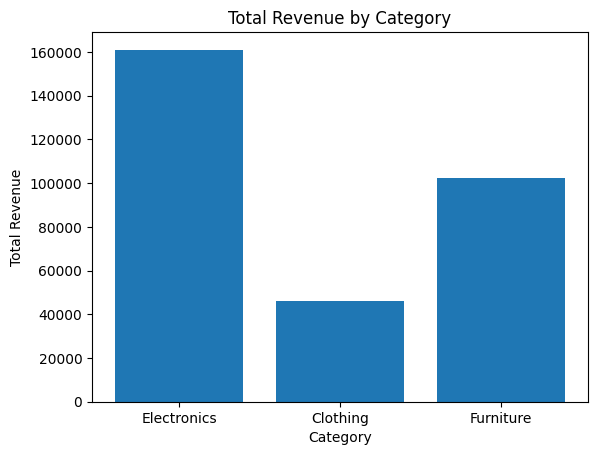

In [22]:
pdf_cat_rev = df.groupBy("category").agg(_sum("revenue").alias("total_revenue")).toPandas()
plt.bar(pdf_cat_rev['category'], pdf_cat_rev['total_revenue'])
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Category")
plt.show()
plt.close()


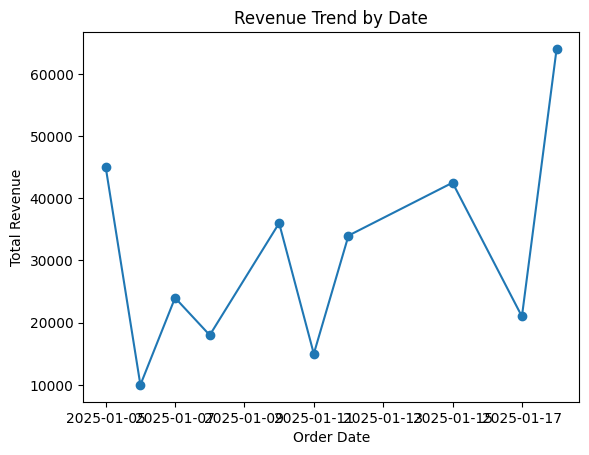

In [31]:
pdf_trend = df.groupBy("order_date").agg(_sum("revenue").alias("total_revenue")).orderBy("order_date").toPandas()
plt.plot(pdf_trend['order_date'], pdf_trend['total_revenue'], marker='o')
plt.xlabel("Order Date")
plt.ylabel("Total Revenue")
plt.title("Revenue Trend by Date")
plt.show()
plt.close()

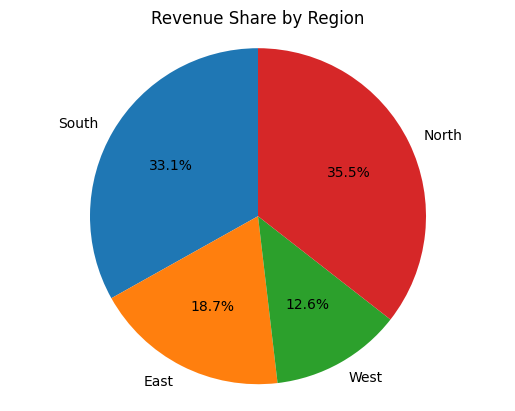

In [46]:
pdf_region_rev = df.groupBy("region").agg(_sum("revenue").alias("total_revenue")).toPandas()
plt.pie(pdf_region_rev['total_revenue'], labels=pdf_region_rev['region'], autopct='%1.1f%%', startangle=90)
plt.title("Revenue Share by Region")
plt.axis('equal')
plt.show()
plt.close()

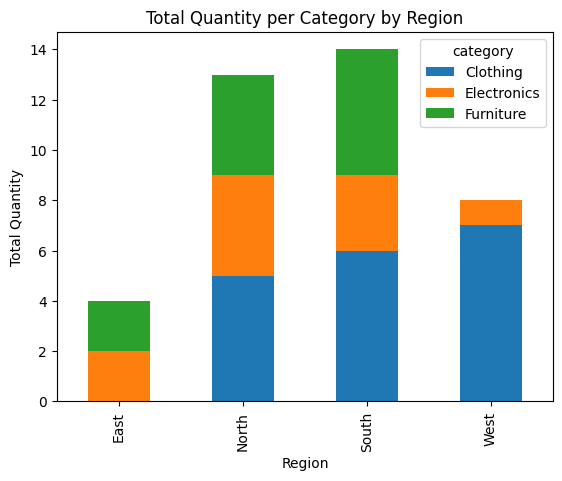

In [55]:
pdf_stack = df.groupBy("region", "category").agg(_sum("quantity").alias("total_quantity")).toPandas()
pivot_stack = pdf_stack.pivot(index='region', columns='category', values='total_quantity').fillna(0)
pivot_stack.plot(kind='bar', stacked=True)
plt.xlabel("Region")
plt.ylabel("Total Quantity")
plt.title("Total Quantity per Category by Region")
plt.show()
plt.close()

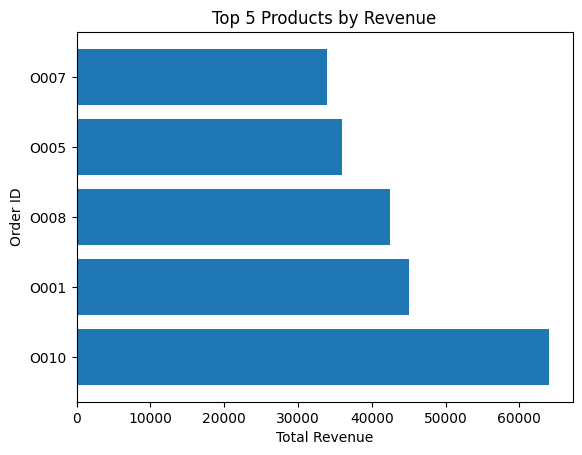

In [63]:
pdf_top5 = df.groupBy("order_id").agg(_sum("revenue").alias("total_revenue")).orderBy(col("total_revenue").desc()).limit(5).toPandas()
plt.barh(pdf_top5['order_id'], pdf_top5['total_revenue'])
plt.xlabel("Total Revenue")
plt.ylabel("Order ID")
plt.title("Top 5 Products by Revenue")
plt.show()
plt.close()

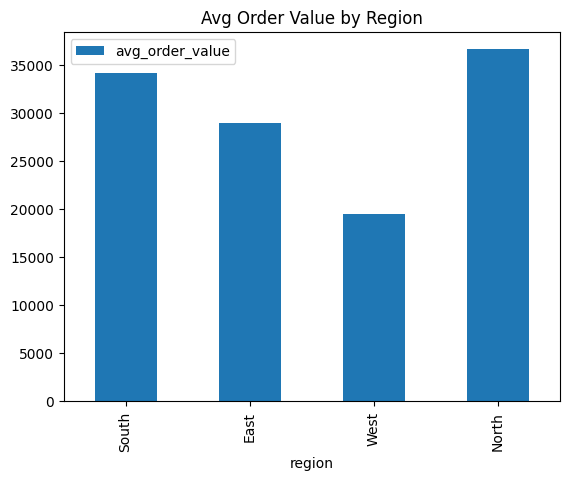

In [71]:
df.groupBy("region").agg(avg("revenue").alias("avg_order_value")).toPandas().plot(
    x="region", y="avg_order_value", kind="bar", title="Avg Order Value by Region")
plt.show()

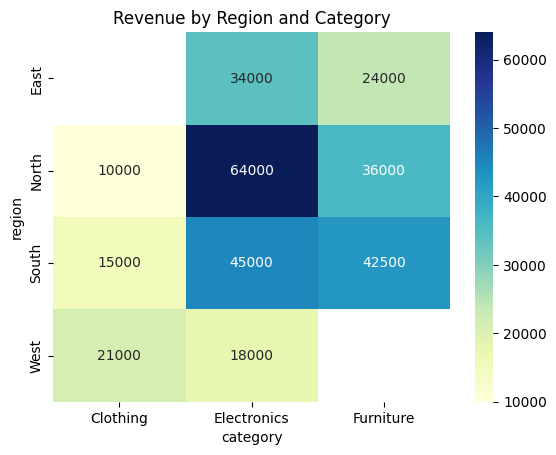

In [83]:
pdf_heatmap = df.groupBy("region", "category").agg(_sum("revenue").alias("total_revenue")).toPandas()
sns.heatmap(pdf_heatmap.pivot(index="region", columns="category", values="total_revenue"), annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Revenue by Region and Category")
plt.show()

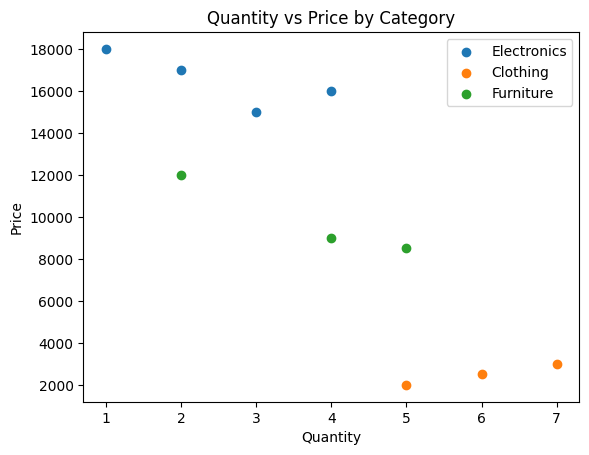

In [90]:
pdf = df.toPandas()
for cat in pdf['category'].unique():
    subset = pdf[pdf['category'] == cat]
    plt.scatter(subset['quantity'], subset['price'], label=cat)
plt.xlabel("Quantity")
plt.ylabel("Price")
plt.title("Quantity vs Price by Category")
plt.legend()
plt.show()

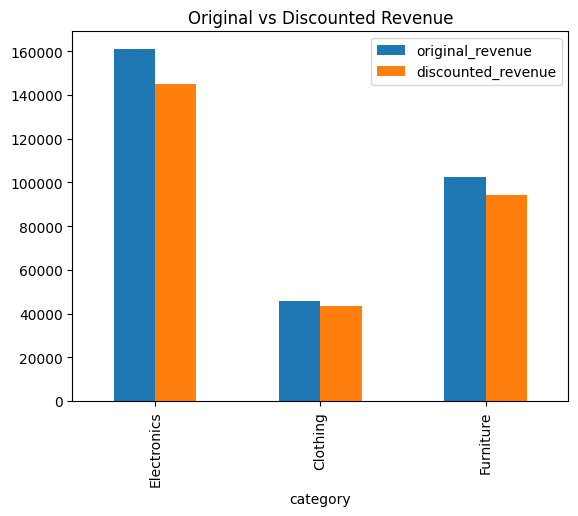

In [96]:
df_discount = df.withColumn("discount_rate", when(col("category") == "Electronics", lit(0.10))
                                           .when(col("category") == "Clothing", lit(0.05))
                                           .when(col("category") == "Furniture", lit(0.08))
                                           .otherwise(lit(0.0)))
df_discount = df_discount.withColumn("discounted_revenue", col("revenue") * (1 - col("discount_rate")))
df_discount.groupBy("category").agg(
    _sum("revenue").alias("original_revenue"),
    _sum("discounted_revenue").alias("discounted_revenue")
).toPandas().plot(x="category", kind="bar", title="Original vs Discounted Revenue")
plt.show()